In [41]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import eli5
from eli5.sklearn import PermutationImportance

In [42]:
train_path = "../modified_data/v04_train.csv"
test_path = "../modified_data/v04_test.csv"

In [43]:
train = pd.read_csv(train_path, index_col=0)
test = pd.read_csv(test_path,index_col=0)

In [44]:
train["is_test"] = 0
test["is_test"] = 1
concat = pd.concat([train, test])

In [45]:
concat.shape

(1128094, 42)

In [46]:
concat.columns

Index(['번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도',
       '등기신청일자', '거래유형', 'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-사용검사일-사용승인일', 'k-연면적',
       'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)',
       'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-등록일자', 'k-수정일자', '건축면적', '주차대수',
       '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y',
       '단지신청일', 'target', '시', '구', '동', 'is_test'],
      dtype='object')

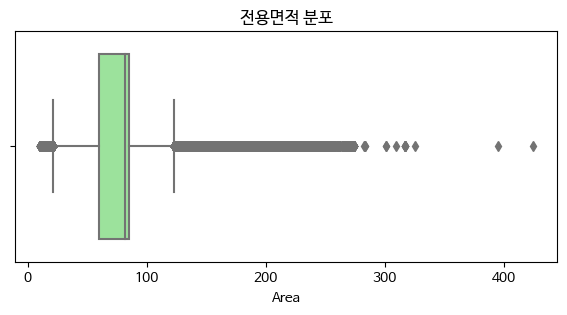

In [47]:
fig = plt.figure(figsize=(7, 3))
sns.boxplot(data = concat, x = '전용면적(㎡)', color='lightgreen')
plt.title('전용면적 분포')
plt.xlabel('Area')
plt.show()

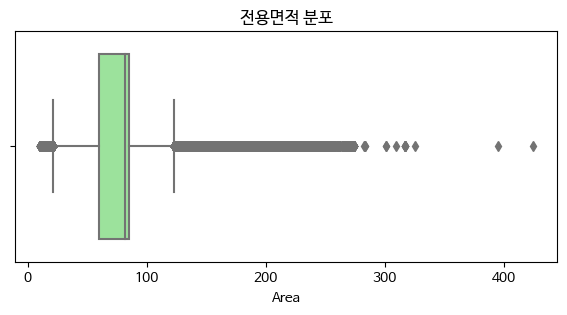

In [48]:
fig = plt.figure(figsize=(7, 3))
sns.boxplot(data = concat, x = '전용면적(㎡)', color='lightgreen')
plt.title('전용면적 분포')
plt.xlabel('Area')
plt.show()

test는 300까지 있으므로 이상치 제거해도 괜찮을 것 같음

In [49]:
def remove_outliers_iqr(dt, column_name):
    df = dt.query('is_test == 0')       # train data 내에 있는 이상치만 제거하도록 하겠습니다.
    df_test = dt.query('is_test == 1')

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    result = pd.concat([df, df_test])   # test data와 다시 합쳐주겠습니다.
    return result

In [50]:
concat_select = remove_outliers_iqr(concat, '전용면적(㎡)')

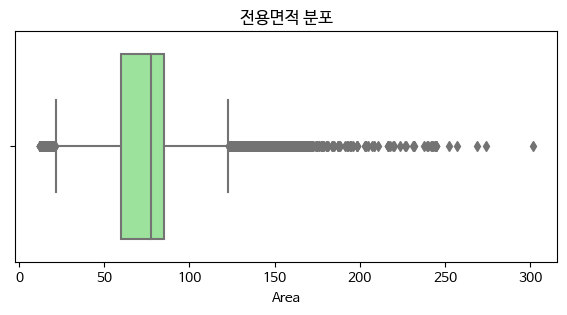

In [51]:
fig = plt.figure(figsize=(7, 3))
sns.boxplot(data = concat_select, x = '전용면적(㎡)', color='lightgreen')
plt.title('전용면적 분포')
plt.xlabel('Area')
plt.show()

fig = plt.figure(figsize=(7, 3))
sns.boxplot(data = test, x = '전용면적(㎡)', color='lightgreen')
plt.title('전용면적 분포')
plt.xlabel('Area')
plt.show()

In [52]:
print(concat_select.shape)

(1038846, 42)


In [53]:
concat_select['is_test'].value_counts() 

0    1029574
1       9272
Name: is_test, dtype: int64

In [ ]:
fig = plt.figure(figsize=(7, 3))
sns.boxplot(data = concat, x = '전용면적(㎡)', color='lightgreen')
plt.title('전용면적 분포')
plt.xlabel('Area')
plt.show()

In [ ]:
concat_select['계약년월'] = pd.to_datetime(concat_select['계약연월'])

# 아파트별 계약연월에 따른 가격 그래프 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(data=concat_select, x='계약연월', y='매매가', hue='아파트명', marker='o', markersize=10, palette='Set1')
plt.title('아파트별 계약연월에 따른 매매가 추이')
plt.xlabel('계약연월')
plt.ylabel('매매가')
plt.xticks(rotation=45)
plt.legend(title='아파트명', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()